## Perguntas a serem respondidas:  
### Ação combativa
- Qual o impacto do recebimento do SMS em cada grupo?
  - Geral
  - Problemas de saúde
  - Idade

### Ação paliativa
- Qual a faixa etária mais assídua e a mais ausente? 
- Qual(is) o(s) bairro(s) de pessoas menos assíduas? 
- Quais os problemas de saúde das pessoas menos assíduas? 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('appointment_prediction_data.xlsx')

In [5]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDayOfWeek'] = df['ScheduledDay'].dt.day_name()

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayOfWeek,ScheduledDayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


In [8]:
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MARIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTONIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARA','INHANGUET√Å':'INHAGUETA','UNIVERSIT√ÅRIO':'UNIVERSITARIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.drop_duplicates(subset='AppointmentID', keep='first')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,AppointmentDayOfWeek,ScheduledDayOfWeek
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56.0,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,Tuesday
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51.0,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,Tuesday
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21.0,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,Wednesday
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38.0,MARIA ORTIZ,0,0,0,0,0,1,1,Tuesday,Wednesday


In [9]:
attendance_percent = df['Compareceu'].mean()
attendance_percent

0.7981062284644533

In [10]:
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Percentual de comparecimento 

In [11]:
contagem_comparecimento = (df['Compareceu']==1).sum()
total_de_consultas = len(df['AppointmentID'])

foram_percent = (contagem_comparecimento/total_de_consultas)*100 
faltaram_percent = (100 - foram_percent)  

print(f'A assiduidade nas consultas foi de {foram_percent:.2f}%. Ausência de {faltaram_percent:.2f}%. ')

A assiduidade nas consultas foi de 79.81%. Ausência de 20.19%. 


### percentual de ausencia pelo sexo biológico, coluna 'Gender'


In [12]:
df.groupby('Gender')['Compareceu'].mean()

Gender
F    0.796883
M    0.800377
Name: Compareceu, dtype: float64

### percentual de ausencia entre os benificiários do bolsa família


In [13]:
# percentual de ausencia entre os benificiários do bolsa família
df.groupby('Scholarship')['Compareceu'].mean()

Scholarship
0    0.801970
1    0.762637
Name: Compareceu, dtype: float64

### percentual de ausência entre o grupo PCD


In [14]:
df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
#df['Handcap'].value_counts()

df.groupby('Handcap')['Compareceu'].mean() # bronze

Handcap
0    0.797685
1    0.818466
Name: Compareceu, dtype: float64

### percentual de ausência entre os pacientes com problemas com álcool


In [15]:
# percentual de ausência entre os alcoólótras
df.groupby('Alcoholism')['Compareceu'].mean()

Alcoholism
0    0.798094
1    0.798512
Name: Compareceu, dtype: float64

### percentual de ausência entre os diabéticos


In [16]:
# percentual de ausência entre os diabéticos
df.groupby('Diabetes')['Compareceu'].mean() # medalha de prata em assiduidade

Diabetes
0    0.796408
1    0.820035
Name: Compareceu, dtype: float64

### percentual de ausência entre os hipertensos


In [17]:
# percentual de ausência entre os hipertensos
df.groupby('Hipertension')['Compareceu'].mean() # campeões em assiduidade

Hipertension
0    0.791014
1    0.826968
Name: Compareceu, dtype: float64

### Percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS


In [18]:
# percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS
df.groupby('SMS_received')['Compareceu'].mean()

# percebe-se que quem recebe sms tende a faltar mais do que o grupo q não recebeu

SMS_received
0    0.833016
1    0.724282
Name: Compareceu, dtype: float64

## Faixa etária


In [19]:
#criar uma coluna de faixa etária
df['Faixa etaria']=pd.cut(df['Age'], bins=[-1,12,18,30,60,125], labels=['Crianças','Adolescentes','Adultons Jovens','Adultos','Idosos'])


In [20]:
# verifica criação de nova coluna faixa etária
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Faixa etaria
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,Friday,0,Idosos
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,Friday,0,Adultos
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,Friday,0,Idosos
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,Friday,0,Crianças
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,Friday,0,Adultos


 ### Qual a faixa etária mais assídua e a mais ausente? 

In [21]:
# agrupa em ordem decrescente a assiduidade por faixa etária
df.groupby('Faixa etaria')['Compareceu'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.847825
Adultos            0.804531
Crianças           0.795307
Adultons Jovens    0.752940
Adolescentes       0.739336
Name: Compareceu, dtype: float64

### qual faixa etária é mais acometida com problemas com álcool? 


In [22]:
df.groupby('Faixa etaria')['Alcoholism'].mean().sort_values(ascending=False)

Faixa etaria
Adultos            0.052093
Idosos             0.037221
Adultons Jovens    0.014747
Adolescentes       0.001916
Crianças           0.000619
Name: Alcoholism, dtype: float64

### qual faixa etária é mais acometida pelo diabetes? 


In [23]:
df.groupby('Faixa etaria')['Diabetes'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.221806
Adultos            0.075080
Adultons Jovens    0.006985
Adolescentes       0.004087
Crianças           0.000904
Name: Diabetes, dtype: float64

### qual faixa etária é mais acometida pelo hipertensão? 

In [24]:
df.groupby('Faixa etaria')['Hipertension'].mean().sort_values(ascending=False)

Faixa etaria
Idosos             0.556743
Adultos            0.231158
Adultons Jovens    0.019285
Adolescentes       0.003704
Crianças           0.000571
Name: Hipertension, dtype: float64

# Bairros: 

### Qual(ais) bairros mais assíduos ? 

In [25]:
df.groupby('Neighbourhood')['Compareceu'].mean().sort_values(ascending=False)
# Os últimos são os bairros de pacientes com maior ausência em consultas

Neighbourhood
PARQUE INDUSTRIAL              1.000000
ILHA DO BOI                    0.914286
AEROPORTO                      0.875000
MARIO CYPRESTE                 0.854447
SOLON BORGES                   0.853191
                                 ...   
ITARARA                        0.737336
SANTA CLARA                    0.735178
SANTA CECÍLIA                  0.725446
SANTOS DUMONT                  0.710815
ILHAS OCEÂNICAS DE TRINDADE    0.000000
Name: Compareceu, Length: 82, dtype: float64

###  Qual(is) bairro(s) detém maior número de beneficiários do programa Bolsa família?


In [26]:
df.groupby('Neighbourhood')['Scholarship'].mean().sort_values(ascending=False)


Neighbourhood
SÃO BENEDITO                   0.280751
DO MOSCOSO                     0.268765
ILHA DO PRÍNCIPE               0.255516
PIEDADE                        0.254425
SANTOS REIS                    0.219378
                                 ...   
PARQUE INDUSTRIAL              0.000000
BARRO VERMELHO                 0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
MORADA DE CAMBURI              0.000000
AEROPORTO                      0.000000
Name: Scholarship, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de pacientes com problemas com álcool? 

In [27]:
df.groupby('Neighbourhood')['Alcoholism'].mean().sort_values(ascending=False)


Neighbourhood
ESTRELINHA           0.146840
DO MOSCOSO           0.130751
SANTA MARTHA         0.109869
DE LOURDE            0.083333
PRAIA DO SUÁ         0.079193
                       ...   
PARQUE INDUSTRIAL    0.000000
MORADA DE CAMBURI    0.000000
MONTE BELO           0.000000
MATA DA PRAIA        0.000000
AEROPORTO            0.000000
Name: Alcoholism, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de hipertensos? 

In [28]:
df.groupby('Neighbourhood')['Hipertension'].mean().sort_values(ascending=False)


Neighbourhood
DE LOURDE                      0.416667
DE LOURDES                     0.344710
SANTA CECÍLIA                  0.323661
PARQUE MOSCOSO                 0.320449
FONTE GRANDE                   0.312317
                                 ...   
ANTÔNIO HONÓRIO                0.018450
NAZARETH                       0.007407
ILHAS OCEÂNICAS DE TRINDADE    0.000000
ILHA DO FRADE                  0.000000
PARQUE INDUSTRIAL              0.000000
Name: Hipertension, Length: 82, dtype: float64

### Qual(is) bairro(s) detém maior número de diabéticos? 

In [29]:
df.groupby('Neighbourhood')['Diabetes'].mean().sort_values(ascending=False)


Neighbourhood
MORADA DE CAMBURI              0.135417
ANDORINHAS                     0.132184
DE LOURDES                     0.122867
COMDUSA                        0.122581
SÃO JOSÉ                       0.120384
                                 ...   
PONTAL DE CAMBURI              0.000000
ILHA DO FRADE                  0.000000
ILHAS OCEÂNICAS DE TRINDADE    0.000000
NAZARETH                       0.000000
AEROPORTO                      0.000000
Name: Diabetes, Length: 82, dtype: float64

In [30]:
df_3plus = df[df['time_delta'] > 3]
df_3plus.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Faixa etaria
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,0,Friday,Monday,4,Adolescentes
33,7.653517e+12,5616921,F,2016-04-25,2016-04-29,38.0,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,Friday,Monday,4,Adultos
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85.0,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,Friday,Wednesday,9,Idosos
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58.0,SÃO CRISTÓVÃO,0,1,0,1,0,1,1,Friday,Monday,4,Adultos
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27.0,GRANDE VITÓRIA,0,0,0,0,0,1,0,Friday,Thursday,29,Adultons Jovens


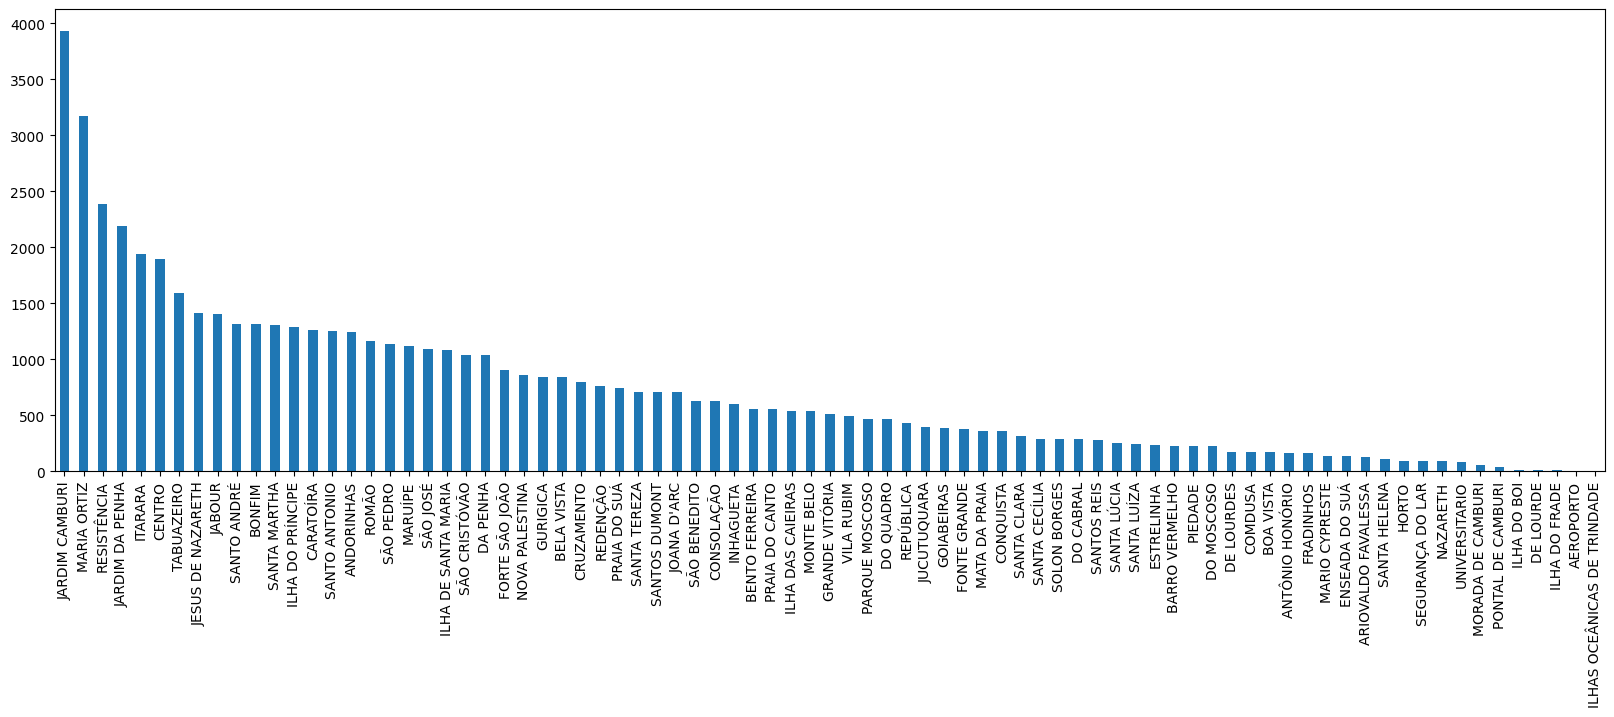

In [ ]:
df_3plus['Neighbourhood'].value_counts().plot(kind='bar', figsize=(20, 6))
plt.show()

In [40]:
df_3plus['Compareceu'].value_counts()


1    40137
0    17167
Name: Compareceu, dtype: int64

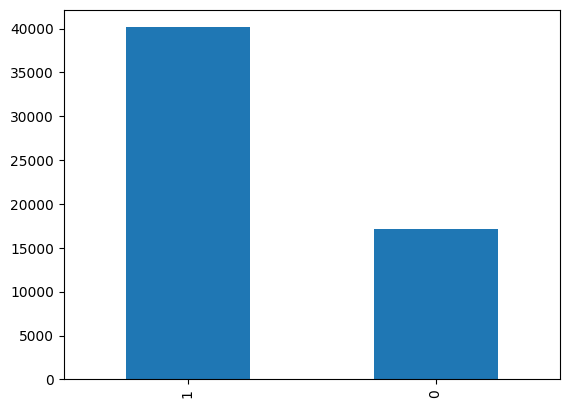

In [ ]:
df_3plus['Compareceu'].value_counts().plot(kind='bar')
plt.show()


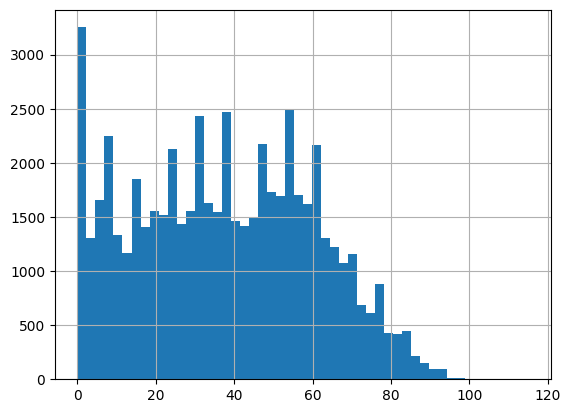

In [ ]:
df_3plus['Age'].hist(bins=50)
plt.show()


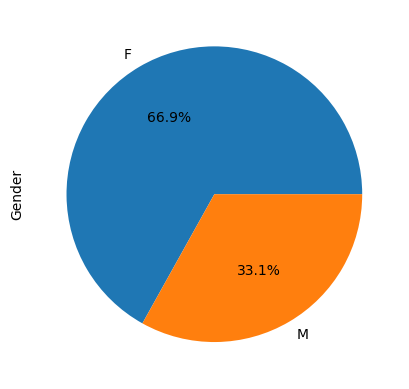

In [ ]:
df_3plus['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


In [46]:
df_3plus.groupby('SMS_received')['Compareceu'].count()

SMS_received
0    22710
1    34594
Name: Compareceu, dtype: int64

In [45]:
df_3plus.groupby(['SMS_received','Compareceu'])['Compareceu'].count()

SMS_received  Compareceu
0             0              7572
              1             15138
1             0              9595
              1             24999
Name: Compareceu, dtype: int64

In [ ]:
df_3plus.groupby('SMS_received')['Compareceu'].mean()

SMS_received
0    0.666579
1    0.722640
Name: Compareceu, dtype: float64

In [ ]:
df.groupby('ScheduledDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

ScheduledDayOfWeek
Saturday     0.958333
Monday       0.802434
Wednesday    0.799028
Tuesday      0.797799
Thursday     0.795187
Friday       0.794654
Name: Compareceu, dtype: float64

In [ ]:
df['AppointmentDayOfWeek'].value_counts()


Wednesday    25882
Tuesday      25648
Monday       22724
Friday       19032
Thursday     17248
Saturday        39
Name: AppointmentDayOfWeek, dtype: int64

In [ ]:
df.groupby('AppointmentDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

AppointmentDayOfWeek
Thursday     0.806470
Wednesday    0.803184
Tuesday      0.799049
Monday       0.793566
Friday       0.787831
Saturday     0.769231
Name: Compareceu, dtype: float64

In [ ]:
df_3plus.groupby('AppointmentDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

AppointmentDayOfWeek
Saturday     0.812500
Wednesday    0.714018
Tuesday      0.707086
Thursday     0.697173
Monday       0.692640
Friday       0.683090
Name: Compareceu, dtype: float64

In [ ]:
df_3plus.groupby('ScheduledDayOfWeek')['Compareceu'].mean().sort_values(ascending=False)

ScheduledDayOfWeek
Saturday     1.000000
Friday       0.711622
Thursday     0.708451
Wednesday    0.702657
Tuesday      0.692581
Monday       0.685968
Name: Compareceu, dtype: float64

<Axes: >

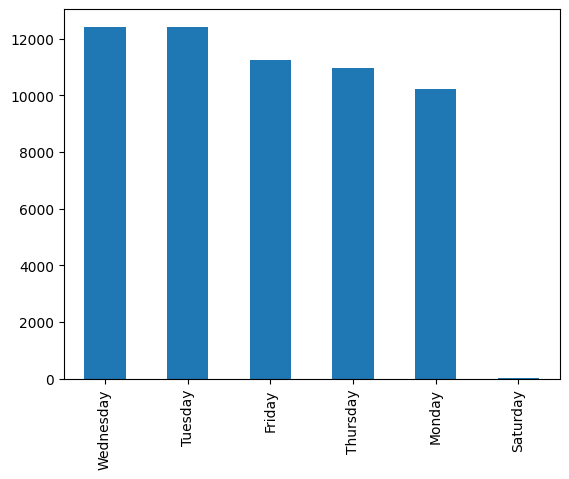

In [ ]:
df_3plus['ScheduledDayOfWeek'].value_counts().plot(kind='bar')

<Axes: >

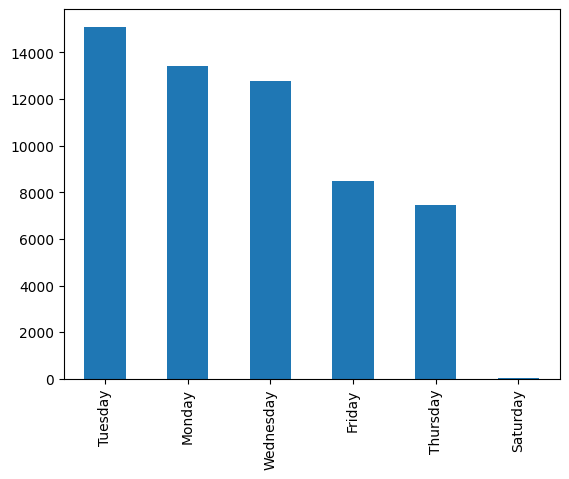

In [ ]:
df_3plus['AppointmentDayOfWeek'].value_counts().plot(kind='bar')


In [62]:
sms_received_by_gender = df_3plus.groupby(['Gender', 'SMS_received'])['Compareceu'].mean().reset_index()

In [63]:
sms_received_by_gender

,Gender,SMS_received,Compareceu
0,F,0,0.670870
1,F,1,0.720329
2,M,0,0.658625
3,M,1,0.727595


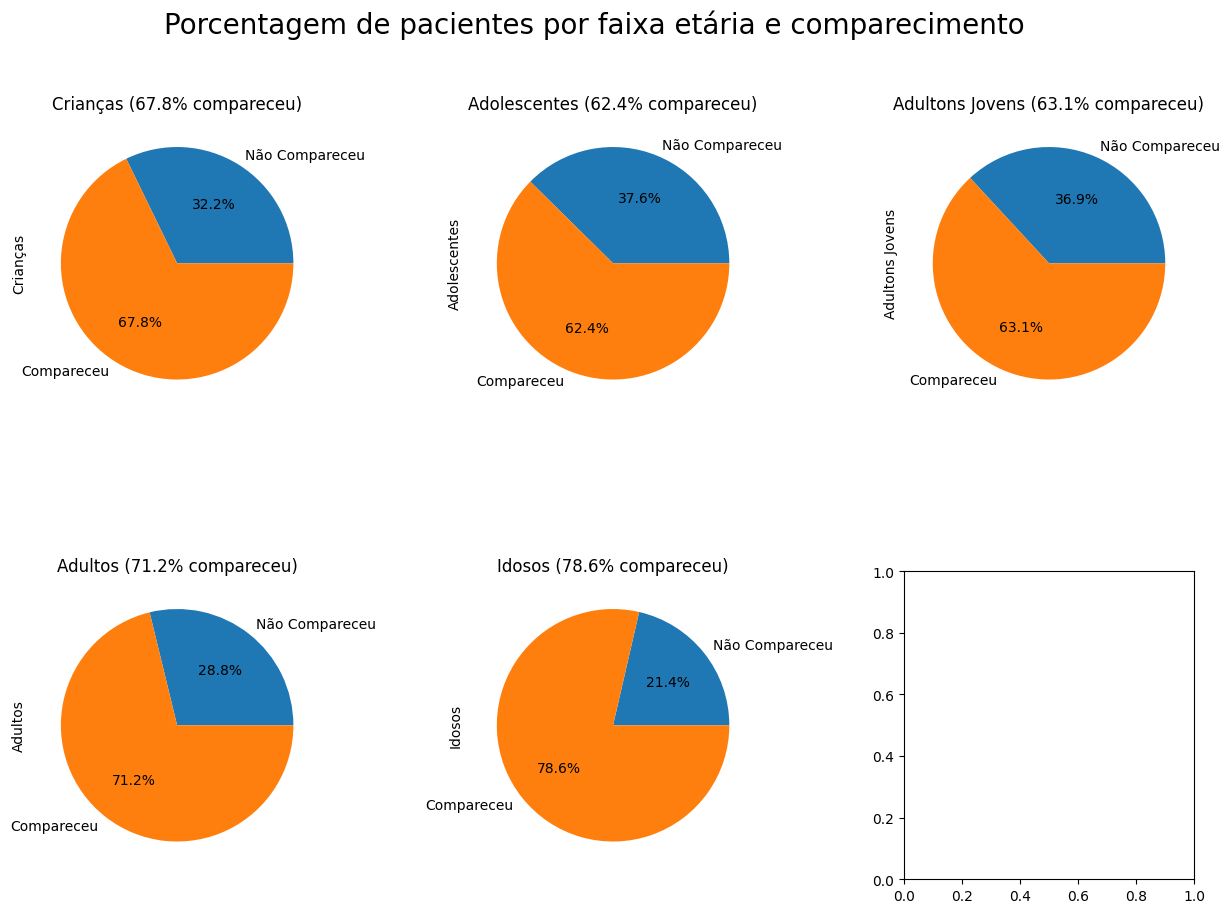

In [ ]:
# Agrupar por faixa etária e comparecimento
age_by_show = df_3plus.groupby(['Faixa etaria', 'Compareceu'])['PatientId'].count().unstack()

# Criar subplot para cada faixa etária
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# Título principal
fig.suptitle('Porcentagem de pacientes por faixa etária e comparecimento', fontsize=20)

# Loop pelas faixas etárias
for i, (index, data) in enumerate(age_by_show.iterrows()):
    # Calcular porcentagem de comparecimento
    total = data.sum()
    compareceu = data[1]
    porcentagem = compareceu / total * 100
    
    # Definir posição do subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Plotar gráfico de pizza
    data.plot(kind='pie', 
              ax=ax, 
              autopct='%1.1f%%', 
              labels=['Não Compareceu', 'Compareceu'],
              title=f'{index} ({porcentagem:.1f}% compareceu)')
    
# Ajustar espaçamento entre subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Exibir gráfico
plt.show()


In [ ]:
sms_by_age_show = df_3plus.groupby(['Faixa etaria', 'SMS_received', 'Compareceu'])['PatientId'].count().unstack()

In [ ]:
sms_by_age_show

Compareceu                       0      1
Faixa etaria    SMS_received             
Crianças        0             1611   2772
                1             1732   4264
Adolescentes    0              644    960
                1              801   1437
Adultons Jovens 0             1306   2037
                1             2018   3653
Adultos         0             2976   6147
                1             3881  10802
Idosos          0             1031   3216
                1             1153   4808

<h1>Resultados do envio de SMS</h1>
<h3>Introdução</h3>
O envio de SMS para lembrar os pacientes de consultas médicas pode ser uma forma eficaz de melhorar a adesão ao tratamento e, consequentemente, a saúde do paciente. Nesta apresentação, iremos analisar os resultados da nossa campanha de envio de SMS para pacientes em Vitória-ES que têm consultas agendadas.

<h3>Dados</h3>
Os dados utilizados neste projeto foram obtidos a partir da base de dados 'Brazil's Medical Appointment - Show/No Show' disponível em https://www.kaggle.com/datasets/sarvaninandipati/brazils-medical-appointment-show-or-no-show. Nele existe a coluna de SMS e podemos relacionar com a coluna de comparecimento para analisar a eficácia dos sms.

<h3>Processos</h3>
Inicialmente, os dados mostravam que o SMS diminuia a taxa de comparecimento. Notamos que as consultas marcadas e realizadas no mesmo dia puxavam a taxa de comparecimento muito pra cima(aproximadamente 95% de comparecimento), e que as pessoas só começavam a receber SMS a partir de 3 dias de diferença da data da marcação para a realização da consulta. Então decidimos isolar esse caso pra fazer o estudo somente em pacientes que tenham um tempo de marcação e realização de consulta maior que 3 dias.


In [35]:
df_3plus = df[df['time_delta'] > 3]
df_3plus.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,AppointmentDayOfWeek,ScheduledDayOfWeek,time_delta,Faixa etaria
22,8.632298e+14,5616091,M,2016-04-25,2016-04-29,13.0,CONQUISTA,0,0,0,0,0,1,0,Friday,Monday,4,Adolescentes
33,7.653517e+12,5616921,F,2016-04-25,2016-04-29,38.0,SÃO CRISTÓVÃO,1,0,0,0,0,1,1,Friday,Monday,4,Adultos
38,5.873316e+12,5609446,M,2016-04-20,2016-04-29,85.0,SÃO CRISTÓVÃO,0,1,0,0,0,1,1,Friday,Wednesday,9,Idosos
46,1.379437e+11,5615608,M,2016-04-25,2016-04-29,58.0,SÃO CRISTÓVÃO,0,1,0,1,0,1,1,Friday,Monday,4,Adultos
49,9.223559e+13,5534656,F,2016-03-31,2016-04-29,27.0,GRANDE VITÓRIA,0,0,0,0,0,1,0,Friday,Thursday,29,Adultons Jovens






<h3>Resultados</h3>
Os resultados mostram que a taxa de comparecimento dos pacientes que receberam o SMS foi [taxa de comparecimento dos pacientes que receberam o SMS]%, enquanto a taxa de comparecimento dos pacientes que não receberam o SMS foi [taxa de comparecimento dos pacientes que não receberam o SMS]%.

Além disso, pudemos observar uma correlação entre o envio de SMS e a taxa de comparecimento dos pacientes. [Gráfico de barras ou outro tipo de gráfico que ilustre a correlação].

É importante ressaltar que, embora esses cálculos possam nos dar uma ideia geral da eficácia do SMS, há muitos outros fatores que podem influenciar a decisão de um paciente de comparecer a uma consulta, como a gravidade da condição médica, o acesso ao transporte, o nível socioeconômico, entre outros. Portanto, esses cálculos devem ser interpretados com cautela e considerando o contexto.

<h3>Conclusão</h3>
Com base nos resultados da nossa análise, podemos concluir que o envio de SMS é uma estratégia eficaz para melhorar a adesão dos pacientes a consultas médicas. Recomendamos que esta estratégia seja adotada por outras instituições médicas em todo o país para melhorar a saúde da população e reduzir os custos com tratamentos médicos desnecessários.

<h1>Vocês teriam algum treinamento da aws pra indicar agora pra gente que está estudando data science?</h1>